# This tutorial intend to show an example of how to extract and compare data from the probe and the cyclops

🚨 Your test logs of the day must be stored in the data folder in the very same format as `test_cyclops.csv` and `test_cyclops.txt`. 

In this notebook we will process as follow :
1. Import the dependencies
2. Select the files we look for depending on the test time
3. Merge and synchronize both files in one
4. Plot the result !

## 1. Import 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from Data_extract import extract_probe_data, extract_cyclops_data, merge_df
from Data_research import research_files_time

## 2. Exctract the probe and cyclops logs

In [6]:
# %% Choose the test time you are looking for !
test_time = datetime.time(14, 37)
test = research_files_time(test_time)

# %% Extract data
df_probe = extract_probe_data(test['file_path_probe'], without_time_zero=True)

# %% Extract Cyclops data
df_cyclops = extract_cyclops_data(test['file_path_cyclops'])

## 3. Merge both files in one. The time is the key for synchronizing both files

In [4]:
# %% Merge both files based on their time
df_merged = merge_df(df_probe, df_cyclops, save_result = True)

## 4. Plot

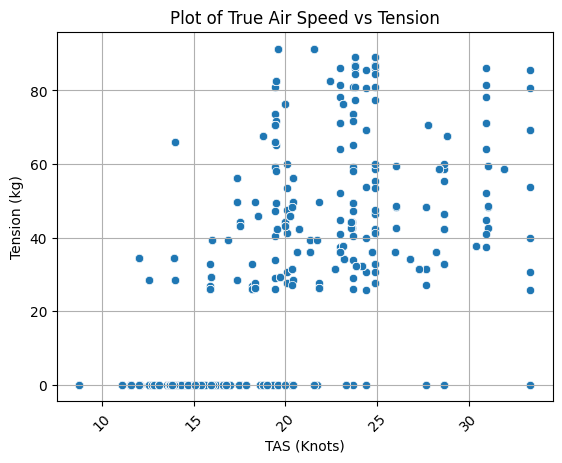

In [5]:
# %% Plot
sns.scatterplot(x='TAS_knots', y='800kg', data=df_merged)
# sns.scatterplot(x='Time_UTC_x', y='TAS_knots', data=df_merged)

# labels and titles
plt.xlabel("TAS (Knots)")
plt.ylabel("Tension (kg)")
plt.title("Plot of True Air Speed vs Tension")
plt.xticks(rotation=45)

# print
plt.grid()
plt.show()